In [110]:
import sys
sys.path.append('/home/nadzya/Apps/log-anomaly-detector/')

In [117]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import json

from anomaly_detector.storage.mongodb_storage import MongoDBDataStorageSource
from anomaly_detector.config import Configuration
from anomaly_detector.storage.storage_attribute import MGStorageAttribute
from anomaly_detector.core.encoder import LogEncoderCatalog
from anomaly_detector.storage.storage import DataCleaner
from anomaly_detector.model.w2v_model import W2VModel

In [112]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [113]:
with open(r"/home/nadzya/Apps/log-anomaly-detector/validation_data/deduplicator-utm-anomaly-278.json", "w+") as file:
    file.write(json.dumps(df_logs[1]))

In [114]:
with open(r"/home/nadzya/Apps/log-anomaly-detector/validation_data/deduplicator-utm-anomaly-278.json", 'r') as file:
    df = pd.json_normalize(json.load(file))
df

,message,host_ip,hostname,anomaly_score,anomaly,_id.$oid,timestamp.$date
0,<13>Dec 1 16:31:27 U22020000000877 vectra_sta...,172.17.18.39,172.17.18.39,0.980689,1,61a7793a30a6e5e8a18672be,1638387096513
1,<13>Dec 1 16:11:53 U22020000000877 vectra_sta...,172.17.18.39,172.17.18.39,0.991152,1,61a774a330a6e5e8a18672bd,1638385920085
2,<13>Dec 1 16:05:31 U22020000000877 vectra_sta...,172.17.18.39,172.17.18.39,0.992513,1,61a7732930a6e5e8a18672bc,1638385541985
3,<13>Dec 1 15:15:23 U22020000000877 vectra_sta...,172.17.18.39,172.17.18.39,0.990848,1,61a7676930a6e5e8a18672ba,1638382532794
4,<13>Dec 1 15:15:22 U22020000000877 vectra_sta...,172.17.18.39,172.17.18.39,0.992443,1,61a7676930a6e5e8a18672bb,1638382532779
...,...,...,...,...,...,...,...
273,"<190>date=2021-11-25 time=15:11:07 devname=""SL...",172.17.31.10,172.17.31.10,0.998706,1,61a08f57160d61b58c7b156d,1637933975169
274,"<190>date=2021-11-25 time=14:46:49 devname=""SL...",172.17.31.10,172.17.31.10,0.998731,1,61a08f57160d61b58c7b156e,1637933972628
275,"<190>date=2021-11-26 time=09:31:08 devname=""SL...",172.17.31.10,172.17.31.10,0.998524,1,61a08f57160d61b58c7b156f,1637933962122
276,"<190>date=2021-11-25 time=13:11:49 devname=""SL...",172.17.31.10,172.17.31.10,0.998256,1,61a08ea2160d61b58c7b156b,1637933776694


In [115]:
cleaner = DataCleaner()
cleaner._preprocess(df)

In [116]:
cfg = Configuration()
cfg.TRAIN_VECTOR_LENGTH = 25
cfg.TRAIN_WINDOW = 5

model = W2VModel(cfg)
model.create(df, cfg.T)

enc.encode_log(df)

ModelLoadException: Could not load a model. File /opt/anomaly_detector/models/W2V.model does not exist

In [97]:
# Get different messages
print(len(set(df["message"])))
set(df["message"])

11


{'DecUvectrastandardDETECTdetectioncategoryCOMMANDCONTROLtypeHiddenHTTPSTunnelhostnameavaskincurrentIPdvchostthreatcertaintyURLhttpsdetectionsdetailidDestinationIPDestinationDomainserankinghelpcrunchcomDestinationPortPrototcptriagedFalseBytesSentBytesRcvdUTCTimeStartUTCTimeEnd',
 'DecUvectrastandardDETECTdetectioncategoryINFOtypeNovelExternalDestinationPorthostnamefaxsolidexminskbycurrentIPdvchostthreatcertaintyURLhttpsdetectionsdetailidDestinationIPDestinationDomainsiptelecombyDestinationPortProtoudptriagedFalseBytesSentBytesRcvdUTCTimeStartUTCTimeEnd',
 'DecUvectrastandardHOSThostcategoryHOSTSCORINGhostNamematveypccurrentIPdvchostthreatcertaintyprivilegescoreDecreasesFalseURLhttpshostsUTCTimesourceKeyAssetFalsedestKeyAssetFalsehostRoles',
 'DecUvectrastandardHOSThostcategoryHOSTSCORINGhostNamepaullptpcurrentIPdvchostthreatcertaintyprivilegescoreDecreasesFalseURLhttpshostsUTCTimesourceKeyAssetFalsedestKeyAssetTruehostRoles',
 'DecUvectrastandardcampaignsCAMPAIGNcampaignidactionADDreas

In [98]:
vectors = enc.one_vector(df_logs[0])

In [99]:
dbscan = DBSCAN(eps=0.05, min_samples=2)
clusters = dbscan.fit_predict(vectors)
print(np.unique(clusters))
clusters

[-1  0  1  2  3  4]


array([-1, -1,  0, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  4,  4,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

# Visualization

## PCA

In [100]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(vectors)

In [102]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


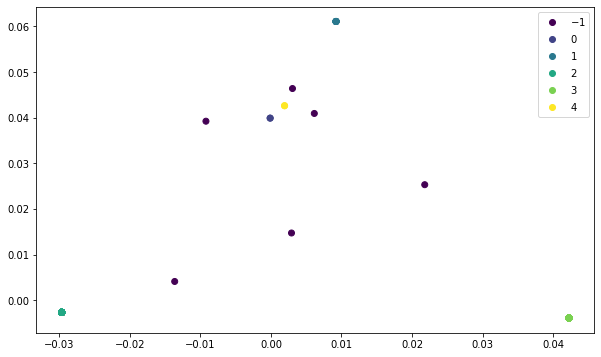

In [109]:
pylab.figure(figsize=(10, 6))
scat = pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c=list(df["cluster"]))
pylab.legend(*scat.legend_elements(num="auto"))

# Aggregation

In [104]:
df['cluster'] = clusters

In [105]:
messages = []
for i in list(df.loc[df['cluster'] == 2].index):
    messages.append(df_logs[1][i]["message"])

In [106]:
messages

['<190>date=2021-11-29 time=21:56:50 devname="SLX-FG-VM-166" devid="FGVM010000010982" logid="0100020027" type="event" subtype="system" level="information" vd="root" eventtime=1638212212000307410 tz="+0300" logdesc="Outdated report files deleted" msg="Delete 3 old report files"',
 '<190>date=2021-11-29 time=21:51:49 devname="SLX-FG-VM-166" devid="FGVM010000010982" logid="0100020027" type="event" subtype="system" level="information" vd="root" eventtime=1638211911997278032 tz="+0300" logdesc="Outdated report files deleted" msg="Delete 3 old report files"',
 '<190>date=2021-11-29 time=21:51:04 devname="SLX-FG-VM-165" devid="FGVM010000010981" logid="0100020027" type="event" subtype="system" level="information" vd="root" eventtime=1638211865418869407 tz="+0300" logdesc="Outdated report files deleted" msg="Delete 13 old report files"',
 '<190>date=2021-11-26 time=06:11:50 devname="SLX-FG-VM-166" devid="FGVM010000010982" logid="0100020027" type="event" subtype="system" level="information" vd="

In [78]:
splited_messages = [x.split() for x in messages]
splited_messages[0]

['<190>date=2021-11-29',
 'time=21:56:50',
 'devname="SLX-FG-VM-166"',
 'devid="FGVM010000010982"',
 'logid="0100020027"',
 'type="event"',
 'subtype="system"',
 'level="information"',
 'vd="root"',
 'eventtime=1638212212000307410',
 'tz="+0300"',
 'logdesc="Outdated',
 'report',
 'files',
 'deleted"',
 'msg="Delete',
 '3',
 'old',
 'report',
 'files"']

In [76]:
len(messages)

154